# **Chapter 6: Decision Trees**

## **1. Pendahuluan**

Decision Trees (Pohon Keputusan) adalah algoritma Machine Learning yang serbaguna, mampu melakukan klasifikasi, regresi, dan bahkan tugas *multioutput*. Mereka adalah algoritma yang kuat dan mampu menyesuaikan diri dengan dataset yang kompleks.

**Mengapa Bab ini Penting?**
* **White Box Model:** Berbeda dengan Neural Networks yang sering dianggap sebagai "Black Box", Decision Trees sangat intuitif. Kita bisa melihat dan memahami dengan jelas mengapa model membuat keputusan tertentu.
* **Fundamental Random Forest:** Decision Trees adalah komponen dasar dari Random Forests, salah satu algoritma ML paling kuat saat ini.
* **Pre-processing Minimal:** Algoritma ini tidak memerlukan penskalaan fitur (feature scaling) atau pemusatan data.

Dalam bab ini, kita akan membahas cara melatih, memvisualisasikan, dan membuat prediksi dengan Decision Trees, serta memahami algoritma CART yang digunakan di balik layar.

## **2. Melatih dan Memvisualisasikan Decision Tree**

Untuk memahami cara kerjanya, mari kita bangun satu Decision Tree menggunakan dataset Iris yang sudah kita kenal. Kita akan menggunakan `DecisionTreeClassifier` dari Scikit-Learn.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Memuat dataset Iris
iris = load_iris()
X = iris.data[:, 2:] # menggunakan fitur panjang dan lebar petal
y = iris.target

# Melatih Decision Tree Classifier
# max_depth=2 membatasi kedalaman pohon agar mudah divisualisasikan
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Kita dapat memvisualisasikan pohon yang telah dilatih menggunakan fungsi `export_graphviz`. Ini menghasilkan file `.dot` yang dapat dikonversi menjadi gambar.

Secara konseptual (seperti Gambar 6-1), pohon dimulai dari **Root Node** (akar) di bagian atas, kemudian memecah data menjadi subset di **Child Nodes**, hingga mencapai **Leaf Nodes** (daun) yang tidak memiliki anak lagi.

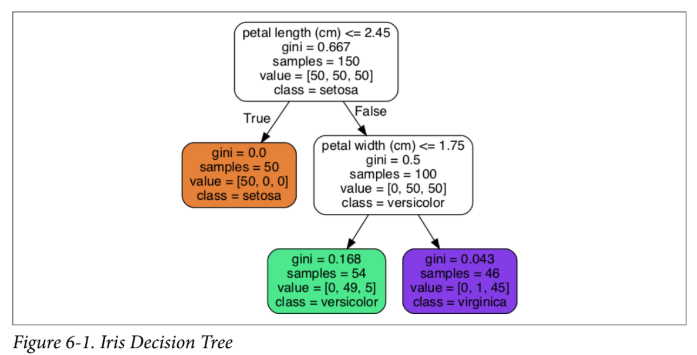

## **3. Membuat Prediksi dan Gini Impurity**

### **Cara Kerja Prediksi**

Bayangkan Anda menemukan bunga iris dan ingin mengklasifikasikannya. Anda mulai dari **Root Node** (kedalaman 0):
1.  Pohon bertanya: "Apakah panjang petal <= 2.45 cm?".
2.  Jika **YA**: Anda turun ke simpul kiri (Leaf Node). Pohon memprediksi kelas **Iris setosa**.
3.  Jika **TIDAK**: Anda turun ke simpul kanan. Di sini ada pertanyaan baru: "Apakah lebar petal <= 1.75 cm?".
4.  Tergantung jawabannya, Anda akan berakhir di salah satu Leaf Node yang memprediksi **Iris versicolor** atau **Iris virginica**.

### **Gini Impurity**

Setiap simpul memiliki atribut `gini` yang mengukur "ketidakmurnian" (impurity). [cite_start]Simpul dianggap "murni" (gini=0) jika semua instance pelatihan di dalamnya termasuk dalam kelas yang sama[cite: 4458].

Rumus Gini Impurity untuk simpul $i$:
$$G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2$$
Dimana $p_{i,k}$ adalah rasio instance kelas $k$ di dalam simpul.

### **Estimasi Probabilitas Kelas**

Decision Tree juga bisa memprediksi probabilitas sebuah instance masuk ke kelas tertentu, yaitu dengan melihat rasio kelas di leaf node tempat instance tersebut jatuh.

In [5]:
# Contoh: Bunga dengan panjang petal 5 cm dan lebar 1.5 cm
# Seharusnya jatuh ke simpul Iris versicolor
flower_features = [[5, 1.5]]

# Prediksi probabilitas untuk setiap kelas
probs = tree_clf.predict_proba(flower_features)
prediction = tree_clf.predict(flower_features)

print(f"Probabilitas Kelas (Setosa, Versicolor, Virginica): {probs}")
print(f"Prediksi Kelas: {iris.target_names[prediction][0]}")

Probabilitas Kelas (Setosa, Versicolor, Virginica): [[0.         0.90740741 0.09259259]]
Prediksi Kelas: versicolor


**Interpretasi Hasil:**

Output probabilitas menunjukkan rasio instance pelatihan di daun tersebut. Misalnya, jika di daun tersebut terdapat 49 Iris Versicolor dan 5 Iris Virginica (total 54), maka probabilitas Versicolor adalah $49/54 \approx 90.7\%$.

## **4. Algoritma Pelatihan CART**

Scikit-Learn menggunakan algoritma **CART (Classification and Regression Tree)** untuk melatih pohon.

### **Mekanisme Splitting**

Algoritma ini bekerja dengan memisahkan training set menjadi dua subset menggunakan fitur $k$ dan threshold $t_k$ (misal: "petal length <= 2.45").
Bagaimana cara memilih $k$ dan $t_k$? CART mencari pasangan yang menghasilkan subset paling murni (meminimalkan cost function).
Cost Function CART untuk klasifikasi:
$$J(k, t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$$

* $G_{left/right}$: Gini impurity dari subset kiri/kanan.
* $m_{left/right}$: Jumlah instance di subset kiri/kanan.

Algoritma ini bersifat **Greedy**: ia mencari pemisahan optimal di tingkat atas, lalu mengulanginya di tingkat bawah, tanpa mempedulikan apakah ini akan mengarah ke solusi optimal global atau tidak.

### **Kompleksitas Komputasi**

* **Prediksi:** Sangat cepat, sekitar $O(\log_2(m))$, tidak tergantung jumlah fitur
* **Pelatihan:** Membandingkan semua fitur pada semua sampel, kompleksitasnya $O(n \times m \log(m))$.

## **5. Regularisasi Hyperparameters**

Decision Trees adalah **Nonparametric Model**: jumlah parameternya tidak ditentukan sebelum pelatihan, sehingga model bebas menyesuaikan diri dengan data. Jika tidak dibatasi, pohon akan sangat dalam dan **Overfitting** (sangat bagus di training data, buruk di data baru).

Untuk mencegah ini, kita perlu membatasi kebebasan pohon (Regularisasi).
Hyperparameter utama di Scikit-Learn:
* `max_depth`: Membatasi kedalaman maksimum pohon.
* `min_samples_split`: Jumlah minimum sampel yang diperlukan untuk memecah simpul.
* `min_samples_leaf`: Jumlah minimum sampel yang harus dimiliki oleh sebuah leaf node.
* `max_leaf_nodes`: Jumlah maksimum leaf node.

Meningkatkan min_* atau mengurangi max_* akan meregularisasi model.

Mari kita lihat efek regularisasi pada dataset **Moons**.

In [6]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

# Membuat dataset Moons
X_m, y_m = make_moons(n_samples=100, noise=0.25, random_state=53)

# Model 1: Tanpa batasan (cenderung Overfitting)
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf1.fit(X_m, y_m)

# Model 2: Dengan Regularisasi (min_samples_leaf=4)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
tree_clf2.fit(X_m, y_m)

print("Model 1 (Tanpa Batasan) Score:", tree_clf1.score(X_m, y_m))
print("Model 2 (Regularisasi) Score:", tree_clf2.score(X_m, y_m))

Model 1 (Tanpa Batasan) Score: 1.0
Model 2 (Regularisasi) Score: 0.96


Model tanpa batasan akan mencoba memisahkan setiap outlier, menghasilkan batas keputusan yang sangat berliku-liku (seperti terlihat di Gambar) dan kurang mampu menggeneralisasi. Model dengan `min_samples_leaf=4` akan menghasilkan batas yang lebih sederhana dan umum.

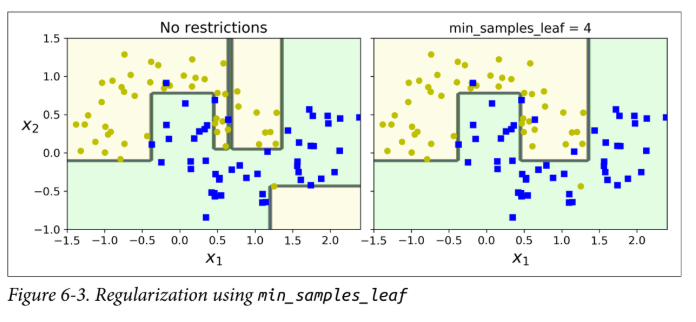

## **6. Regresi**

Decision Trees juga bisa digunakan untuk tugas regresi. Bedanya, alih-alih memprediksi kelas, simpul daun memprediksi sebuah **nilai** (rata-rata dari target value instance pelatihan di daun tersebut).

Algoritma CART untuk regresi mencoba memisahkan data agar meminimalkan **Mean Squared Error (MSE)**, bukan Gini impurity.

$$J(k, t_k) = \frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right}$$

In [7]:
from sklearn.tree import DecisionTreeRegressor

# Membuat data kuadratik dengan noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

# Melatih Regressor
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

# Prediksi untuk nilai baru
x_new = 0.6
y_pred = tree_reg.predict([[x_new]])
print(f"Prediksi nilai untuk x={x_new}: {y_pred[0]}")

Prediksi nilai untuk x=0.6: 0.11063973365732513


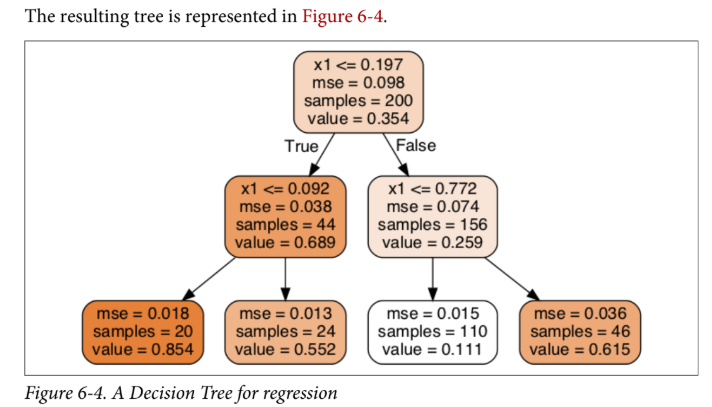

## **7. Keterbatasan dan Ketidakstabilan**

Meskipun kuat, Decision Trees memiliki kelemahan:
1.  **Batas Keputusan Ortogonal:** Semua pemisahan tegak lurus terhadap sumbu. Ini membuat pohon sensitif terhadap rotasi data. Data yang dimiringkan 45 derajat mungkin memerlukan pohon yang sangat dalam dengan bentuk tangga.
2.  **Sensitif terhadap Variasi Kecil:** Perubahan kecil pada data training (misal: menghapus satu instance) bisa menghasilkan pohon yang sama sekali berbeda.

Masalah ketidakstabilan ini nantinya akan diatasi oleh **Random Forests** dengan cara merata-ratakan prediksi dari banyak pohon.

## **8. Kesimpulan**

Dalam Chapter 6 ini, kita telah mempelajari:
* **Decision Trees** adalah model "White Box" yang intuitif untuk klasifikasi dan regresi.
* **Prediksi** dilakukan dengan menelusuri pohon dari akar ke daun berdasarkan aturan threshold fitur.
* **Pelatihan** menggunakan algoritma CART yang bersifat *greedy*, meminimalkan Gini Impurity (klasifikasi) atau MSE (regresi) di setiap langkah.
* **Regularisasi** (seperti `max_depth`, `min_samples_leaf`) sangat penting untuk mencegah overfitting karena sifat alami pohon yang *nonparametric*.
* Kelemahan utama pohon adalah ketidakstabilan, yang menjadi jembatan menuju topik selanjutnya: Random Forests.